In [4]:
#doing things with data
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

import env
import wrangle as w
import explore as e
import prepare as p

In [5]:
# get the data
df = w.wrangle_zillow()
df

csv file found and loaded


,taxvalue,bedrooms,bathrooms,sqft,built,tax,fips,Orange,Ventura
4,296425.0,4.0,2.0,3633.0,2005.0,6941.39,LA,0,0
6,847770.0,3.0,4.0,1620.0,2011.0,10244.94,LA,0,0
7,646760.0,3.0,2.0,2077.0,1926.0,7924.68,LA,0,0
11,5328.0,0.0,0.0,1200.0,1972.0,91.60,LA,0,0
14,6920.0,0.0,0.0,171.0,1973.0,255.17,LA,0,0
...,...,...,...,...,...,...,...,...,...
2152856,422400.0,4.0,4.0,4375.0,2015.0,13877.56,LA,0,0
2152858,960756.0,4.0,3.0,2262.0,2015.0,13494.52,Orange,1,0
2152859,536061.0,4.0,4.5,3127.0,2014.0,6244.16,Orange,1,0
2152861,424353.0,3.0,2.5,1974.0,2015.0,5302.70,Orange,1,0


In [6]:
# split the data
train, validate, test = p.split_data(df)
train

,taxvalue,bedrooms,bathrooms,sqft,built,tax,fips,Orange,Ventura
79491,971944.0,4.0,4.0,4147.0,1936.0,11983.09,LA,0,0
1190772,300625.0,2.0,2.0,1376.0,1949.0,4001.22,LA,0,0
353207,153847.0,4.0,2.5,2080.0,1956.0,1961.52,Orange,1,0
834944,489948.0,3.0,2.0,1454.0,1975.0,6173.68,LA,0,0
1679023,783282.0,5.0,5.0,3614.0,2001.0,10805.58,Orange,1,0
...,...,...,...,...,...,...,...,...,...
756875,198574.0,4.0,3.0,3034.0,1954.0,2698.01,LA,0,0
1994952,229000.0,2.0,1.0,700.0,1920.0,2748.98,LA,0,0
1058065,673096.0,3.0,2.0,1483.0,1950.0,8215.85,LA,0,0
367254,1117790.0,3.0,2.0,1961.0,1940.0,13570.11,LA,0,0


# set train, validate, test

In [7]:
X_train, X_validate, X_test = train[['bedrooms','bathrooms','sqft','built','tax','Orange','Ventura']], validate[['bedrooms','bathrooms','sqft','built','tax','Orange','Ventura']], test[['bedrooms','bathrooms','sqft','built','tax','Orange','Ventura']]
y_train, y_validate, y_test = train.taxvalue, validate.taxvalue, test.taxvalue

# 1 
Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

# MinMAX

In [8]:
#making our scaler
scaler = MinMaxScaler()
#fitting our scaler 
# AND!!!!
#using the scaler on train
X_train_scaled = scaler.fit_transform(X_train)
#using our scaler on validate
X_validate_scaled = scaler.transform(X_validate)

In [9]:
train.head()

,taxvalue,bedrooms,bathrooms,sqft,built,tax,fips,Orange,Ventura
79491,971944.0,4.0,4.0,4147.0,1936.0,11983.09,LA,0,0
1190772,300625.0,2.0,2.0,1376.0,1949.0,4001.22,LA,0,0
353207,153847.0,4.0,2.5,2080.0,1956.0,1961.52,Orange,1,0
834944,489948.0,3.0,2.0,1454.0,1975.0,6173.68,LA,0,0
1679023,783282.0,5.0,5.0,3614.0,2001.0,10805.58,Orange,1,0


In [10]:
X_train_scaled

array([[0.25      , 0.2       , 0.82936587, ..., 0.40007102, 0.        ,
        0.        ],
       [0.125     , 0.1       , 0.27505501, ..., 0.13344486, 0.        ,
        0.        ],
       [0.25      , 0.125     , 0.41588318, ..., 0.06531078, 1.        ,
        0.        ],
       ...,
       [0.1875    , 0.1       , 0.29645929, ..., 0.27423024, 0.        ,
        0.        ],
       [0.1875    , 0.1       , 0.39207842, ..., 0.45308379, 0.        ,
        0.        ],
       [0.125     , 0.075     , 0.24064813, ..., 0.10395116, 1.        ,
        0.        ]])

In [11]:
# Convert the array to a DataFrame
df_X_train_scaled = pd.DataFrame(X_train_scaled)
df_X_train_scaled = df_X_train_scaled.rename(columns={0: 'bedrooms', 1: 'bathrooms', 2: 'sqft', 3: 'built', 4: 'tax', 5: 'Orange', 6:'Ventura'})

df_X_train_scaled


,bedrooms,bathrooms,sqft,built,tax,Orange,Ventura
0,0.2500,0.200,0.829366,0.607843,0.400071,0.0,0.0
1,0.1250,0.100,0.275055,0.671569,0.133445,0.0,0.0
2,0.2500,0.125,0.415883,0.705882,0.065311,1.0,0.0
3,0.1875,0.100,0.290658,0.799020,0.206014,0.0,0.0
4,0.3125,0.250,0.722745,0.926471,0.360738,1.0,0.0
...,...,...,...,...,...,...,...
1253344,0.2500,0.150,0.606721,0.696078,0.089912,0.0,0.0
1253345,0.1250,0.050,0.139828,0.529412,0.091615,0.0,0.0
1253346,0.1875,0.100,0.296459,0.676471,0.274230,0.0,0.0
1253347,0.1875,0.100,0.392078,0.627451,0.453084,0.0,0.0


# visualize rooms 

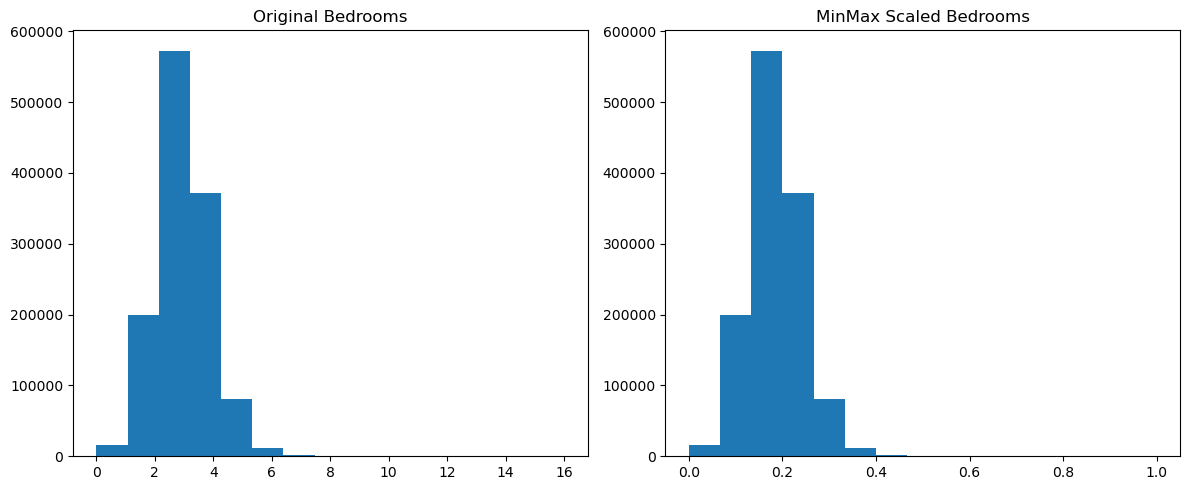

In [12]:
# Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first histogram on the first subplot
axes[0].hist(train.bedrooms, bins=15)
axes[0].set_title('Original Bedrooms')

# Plot the second histogram on the second subplot
axes[1].hist(df_X_train_scaled.bedrooms, bins=15)
axes[1].set_title('MinMax Scaled Bedrooms')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


# Visualize bathrooms

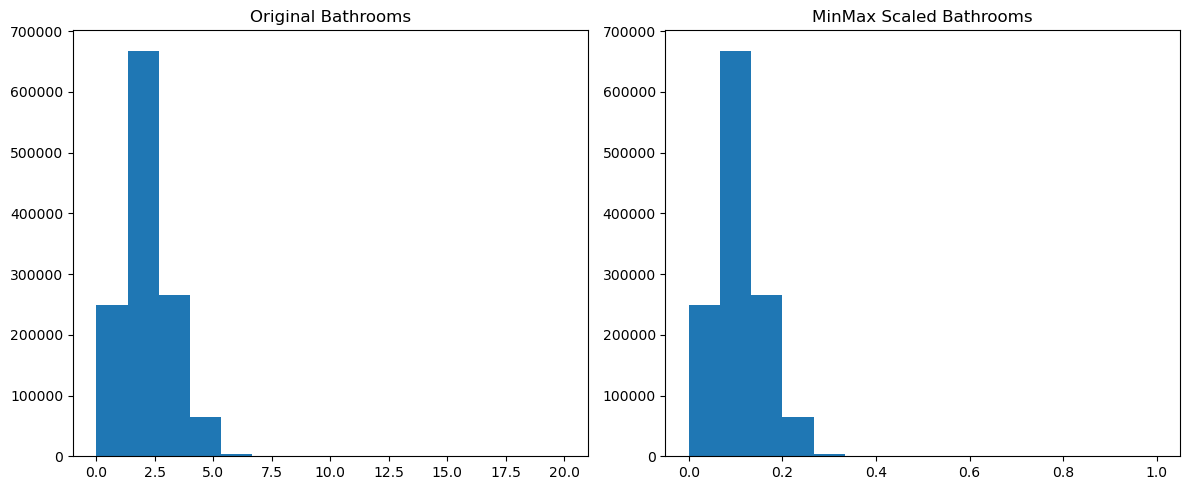

In [13]:


# Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first histogram on the first subplot
axes[0].hist(train.bathrooms, bins=15)
axes[0].set_title('Original Bathrooms')

# Plot the second histogram on the second subplot
axes[1].hist(df_X_train_scaled.bathrooms, bins=15)
axes[1].set_title('MinMax Scaled Bathrooms')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()




# Visualize sqft

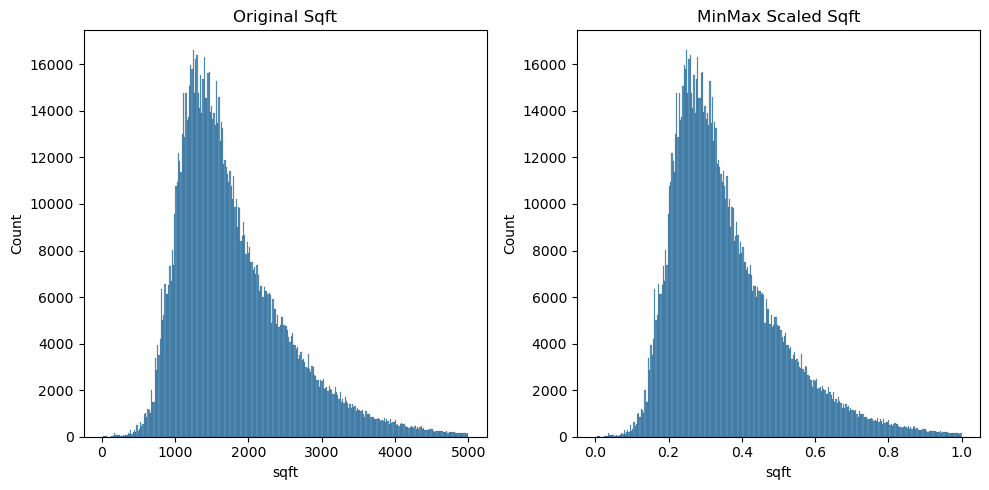

In [14]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram on the first subplot
sns.histplot(x = train.sqft, ax=axes[0])
axes[0].set_title('Original Sqft')

# Plot the second histogram on the second subplot
sns.histplot(x = df_X_train_scaled.sqft, ax=axes[1])
axes[1].set_title('MinMax Scaled Sqft')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Visualize year built

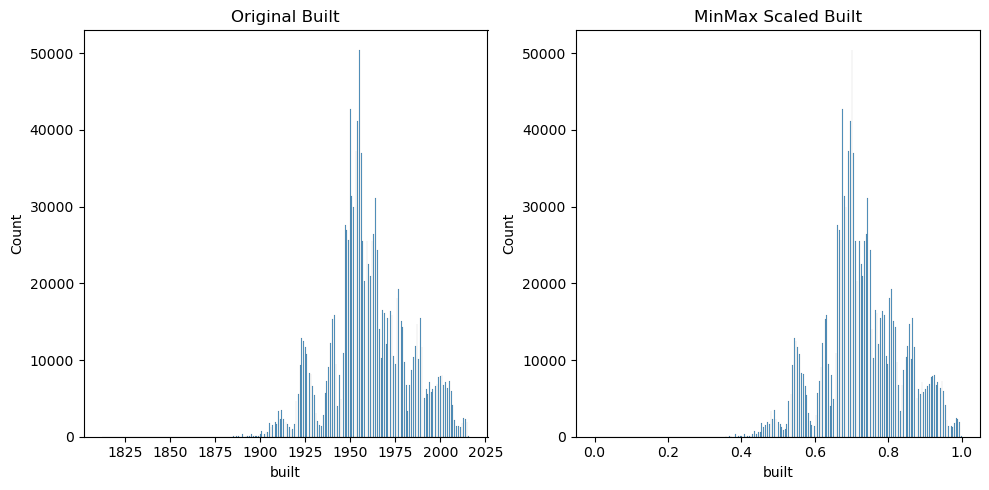

In [15]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram on the first subplot
sns.histplot(x = train.built, ax=axes[0])
axes[0].set_title('Original Built')

# Plot the second histogram on the second subplot
sns.histplot(x = df_X_train_scaled.built, ax=axes[1])
axes[1].set_title('MinMax Scaled Built')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Visualize Tax

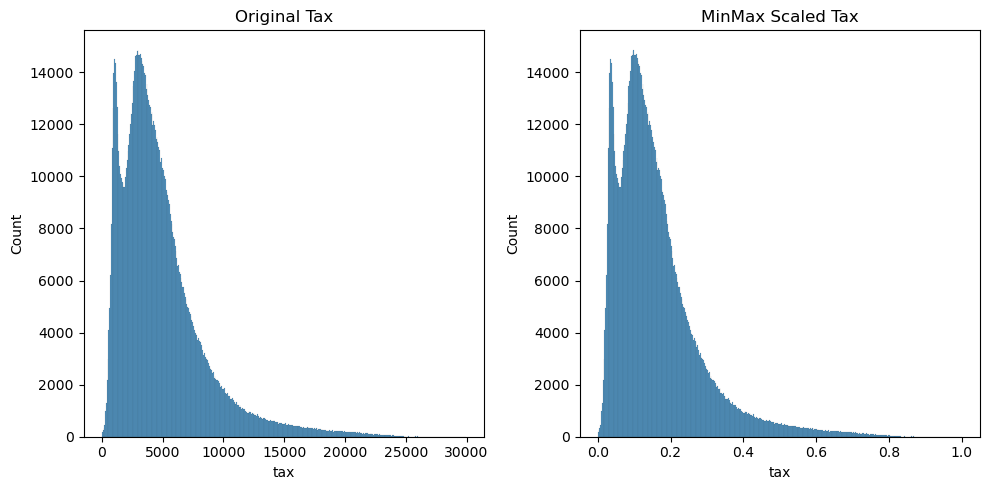

In [16]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram on the first subplot
sns.histplot(x = train.tax, ax=axes[0])
axes[0].set_title('Original Tax')

# Plot the second histogram on the second subplot
sns.histplot(x = df_X_train_scaled.tax, ax=axes[1])
axes[1].set_title('MinMax Scaled Tax')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Standard Scaler

In [17]:
#making our scaler
scaler = StandardScaler()
#fitting our scaler 
# AND!!!!
#using the scaler on train
X_train_scaled = scaler.fit_transform(X_train)
#using our scaler on validate
X_validate_scaled = scaler.transform(X_validate)

In [18]:
X_train_scaled

array([[ 0.81033248,  2.11408165,  3.18100946, ...,  2.00020337,
        -0.58889182, -0.28839533],
       [-1.4111229 , -0.2016439 , -0.54554448, ..., -0.24334788,
        -0.58889182, -0.28839533],
       [ 0.81033248,  0.37728749,  0.40122346, ..., -0.8166686 ,
         1.69810475, -0.28839533],
       ...,
       [-0.30039521, -0.2016439 , -0.40164652, ...,  0.94130414,
        -0.58889182, -0.28839533],
       [-0.30039521, -0.2016439 ,  0.2411874 , ...,  2.44628438,
        -0.58889182, -0.28839533],
       [-1.4111229 , -0.78057529, -0.77685711, ..., -0.49152545,
         1.69810475, -0.28839533]])

In [19]:
df_X_train_scaled = pd.DataFrame(X_train_scaled)
df_X_train_scaled = df_X_train_scaled.rename(columns={0: 'bedrooms', 1: 'bathrooms', 2: 'sqft', 3: 'built', 4: 'tax', 5: 'Orange', 6:'Ventura'})

df_X_train_scaled

,bedrooms,bathrooms,sqft,built,tax,Orange,Ventura
0,0.810332,2.114082,3.181009,-1.126109,2.000203,-0.588892,-0.288395
1,-1.411123,-0.201644,-0.545544,-0.529885,-0.243348,-0.588892,-0.288395
2,0.810332,0.377287,0.401223,-0.208841,-0.816669,1.698105,-0.288395
3,-0.300395,-0.201644,-0.440647,0.662563,0.367289,-0.588892,-0.288395
4,1.921060,3.271944,2.464209,1.855010,1.669228,1.698105,-0.288395
...,...,...,...,...,...,...,...
1253344,0.810332,0.956219,1.684202,-0.300568,-0.609655,-0.588892,-0.288395
1253345,-1.411123,-1.359507,-1.454657,-1.859922,-0.595329,-0.588892,-0.288395
1253346,-0.300395,-0.201644,-0.401647,-0.484021,0.941304,-0.588892,-0.288395
1253347,-0.300395,-0.201644,0.241187,-0.942655,2.446284,-0.588892,-0.288395


# Visualize Rooms

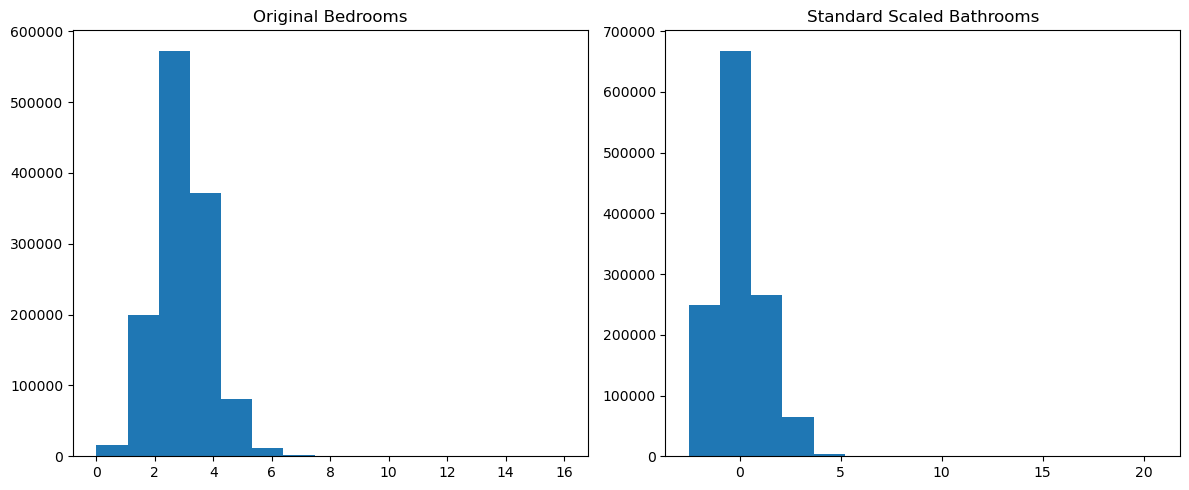

In [20]:
# Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first histogram on the first subplot
axes[0].hist(train.bedrooms, bins=15)
axes[0].set_title('Original Bedrooms')

# Plot the second histogram on the second subplot
axes[1].hist(df_X_train_scaled.bathrooms, bins=15)
axes[1].set_title('Standard Scaled Bathrooms')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Visualize Bathrooms

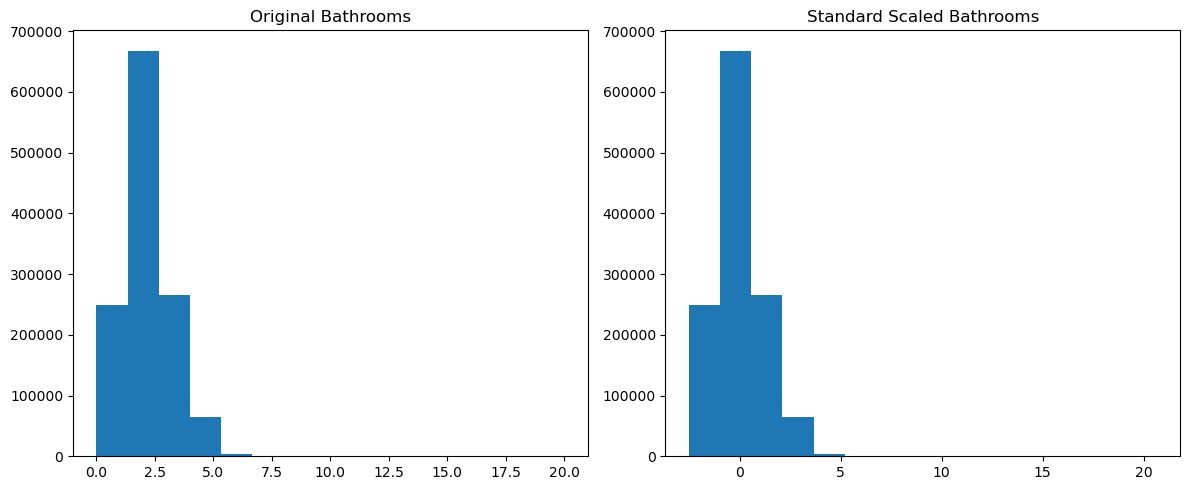

In [21]:
# Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first histogram on the first subplot
axes[0].hist(train.bathrooms, bins=15)
axes[0].set_title('Original Bathrooms')

# Plot the second histogram on the second subplot
axes[1].hist(df_X_train_scaled.bathrooms, bins=15)
axes[1].set_title('Standard Scaled Bathrooms')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Visualize sqft

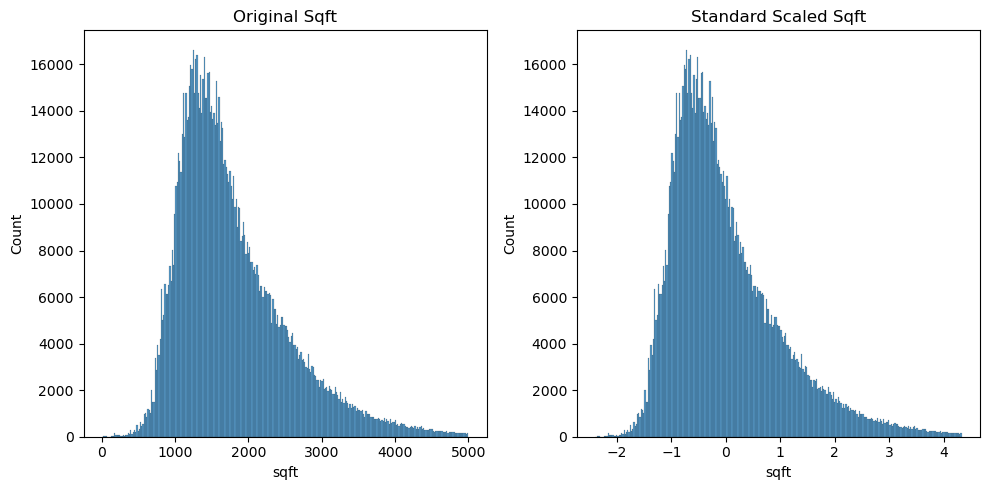

In [22]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram on the first subplot
sns.histplot(x = train.sqft, ax=axes[0])
axes[0].set_title('Original Sqft')

# Plot the second histogram on the second subplot
sns.histplot(x = df_X_train_scaled.sqft, ax=axes[1])
axes[1].set_title('Standard Scaled Sqft')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Visualize built

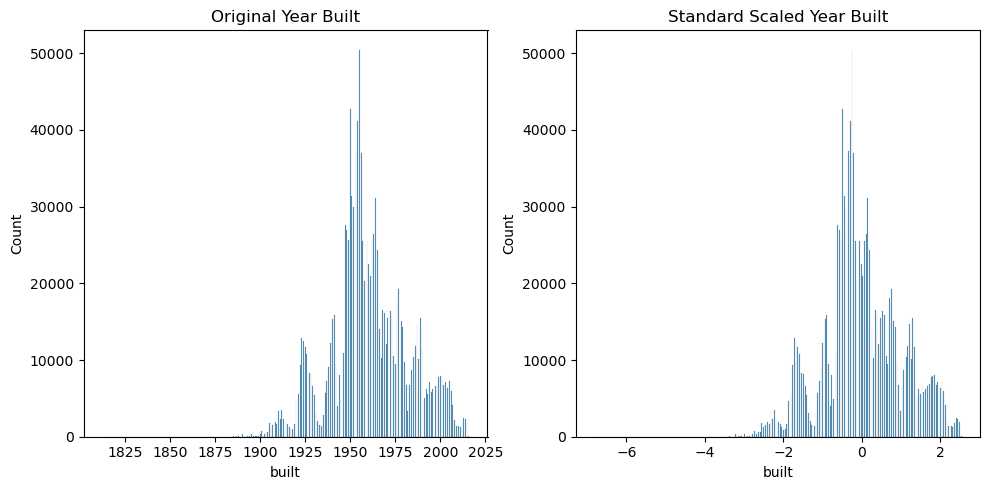

In [23]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram on the first subplot
sns.histplot(x = train.built, ax=axes[0])
axes[0].set_title('Original Year Built')

# Plot the second histogram on the second subplot
sns.histplot(x = df_X_train_scaled.built, ax=axes[1])
axes[1].set_title('Standard Scaled Year Built')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Visualize tax

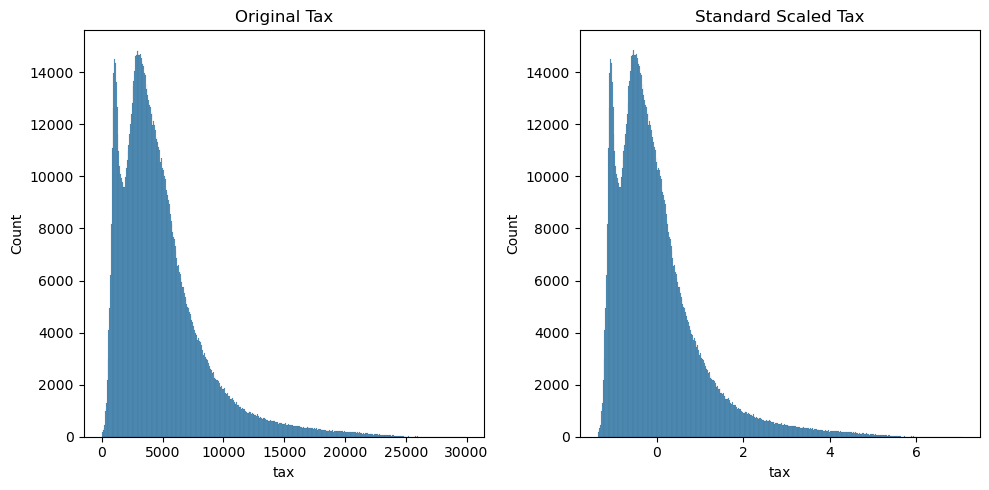

In [24]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram on the first subplot
sns.histplot(x = train.tax, ax=axes[0])
axes[0].set_title('Original Tax')

# Plot the second histogram on the second subplot
sns.histplot(x = df_X_train_scaled.tax, ax=axes[1])
axes[1].set_title('Standard Scaled Tax')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Robust Scaler

In [25]:
#making our scaler
scaler = RobustScaler()
#fitting our scaler 
# AND!!!!
#using the scaler on train
X_train_scaled = scaler.fit_transform(X_train)
#using our scaler on validate
X_validate_scaled = scaler.transform(X_validate)

In [26]:
X_train_scaled

array([[ 1.        ,  2.        ,  2.81929047, ...,  2.16200595,
         0.        ,  0.        ],
       [-1.        ,  0.        , -0.25277162, ..., -0.0080065 ,
         0.        ,  0.        ],
       [ 1.        ,  0.5       ,  0.52771619, ..., -0.562535  ,
         1.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.13414634, ...,  1.13781516,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.39578714, ...,  2.59346539,
         0.        ,  0.        ],
       [-1.        , -0.5       , -0.44345898, ..., -0.24804935,
         1.        ,  0.        ]])

In [27]:
# Convert the array to a DataFrame
df_X_train_scaled = pd.DataFrame(X_train_scaled)
df_X_train_scaled = df_X_train_scaled.rename(columns={0: 'bedrooms', 1: 'bathrooms', 2: 'sqft', 3: 'built', 4: 'tax', 5: 'Orange', 6:'Ventura'})

df_X_train_scaled

,bedrooms,bathrooms,sqft,built,tax,Orange,Ventura
0,1.0,2.0,2.819290,-0.88,2.162006,0.0,0.0
1,-1.0,0.0,-0.252772,-0.36,-0.008007,0.0,0.0
2,1.0,0.5,0.527716,-0.08,-0.562535,1.0,0.0
3,0.0,0.0,-0.166297,0.68,0.582615,0.0,0.0
4,2.0,3.0,2.228381,1.72,1.841879,1.0,0.0
...,...,...,...,...,...,...,...
1253344,1.0,1.0,1.585366,-0.16,-0.362307,0.0,0.0
1253345,-1.0,-1.0,-1.002217,-1.52,-0.348450,0.0,0.0
1253346,0.0,0.0,-0.134146,-0.32,1.137815,0.0,0.0
1253347,0.0,0.0,0.395787,-0.72,2.593465,0.0,0.0


# Visualize Bedrooms

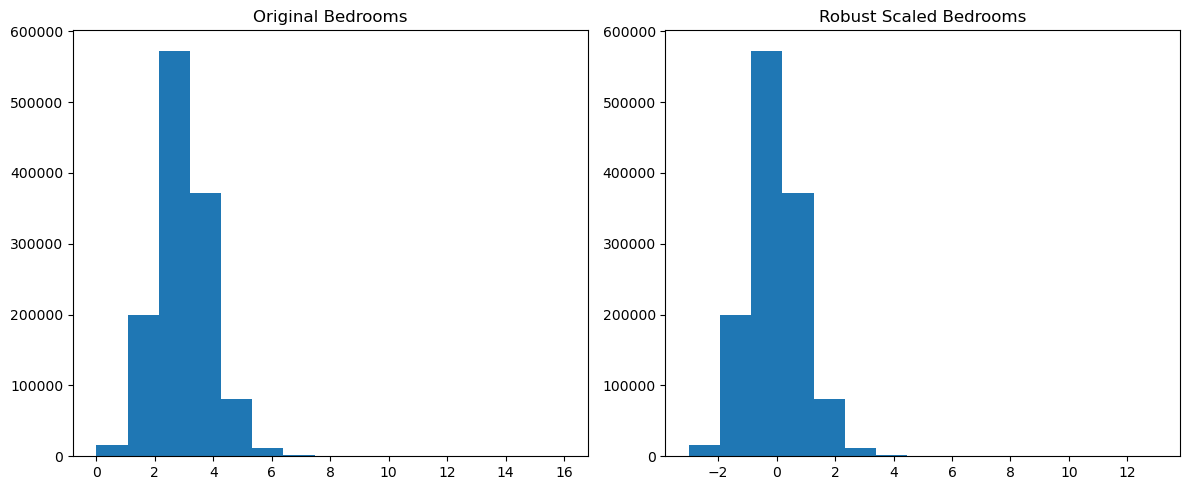

In [28]:
# Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first histogram on the first subplot
axes[0].hist(train.bedrooms, bins=15)
axes[0].set_title('Original Bedrooms')

# Plot the second histogram on the second subplot
axes[1].hist(df_X_train_scaled.bedrooms, bins=15)
axes[1].set_title('Robust Scaled Bedrooms')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Visualize Bathrooms

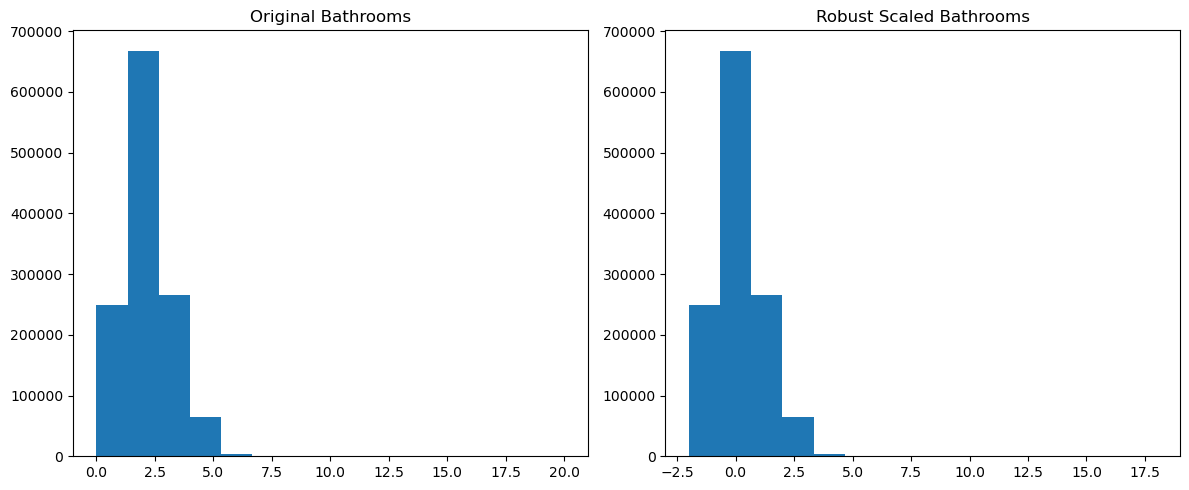

In [29]:
# Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first histogram on the first subplot
axes[0].hist(train.bathrooms, bins=15)
axes[0].set_title('Original Bathrooms')

# Plot the second histogram on the second subplot
axes[1].hist(df_X_train_scaled.bathrooms, bins=15)
axes[1].set_title('Robust Scaled Bathrooms')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Visualize Square feet

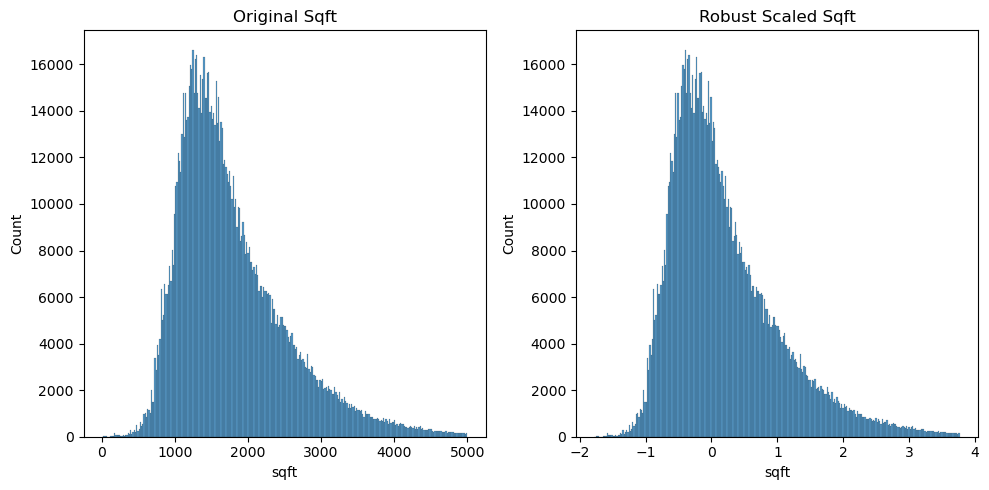

In [30]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram on the first subplot
sns.histplot(x = train.sqft, ax=axes[0])
axes[0].set_title('Original Sqft')

# Plot the second histogram on the second subplot
sns.histplot(x = df_X_train_scaled.sqft, ax=axes[1])
axes[1].set_title('Robust Scaled Sqft')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Visualize Year Built

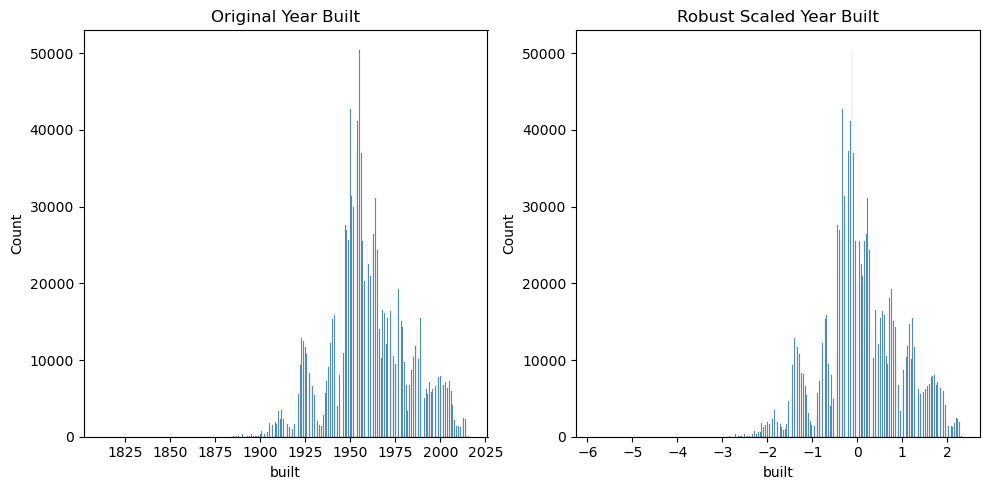

In [31]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram on the first subplot
sns.histplot(x = train.built, ax=axes[0])
axes[0].set_title('Original Year Built')

# Plot the second histogram on the second subplot
sns.histplot(x = df_X_train_scaled.built, ax=axes[1])
axes[1].set_title('Robust Scaled Year Built')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Visualize Taxes

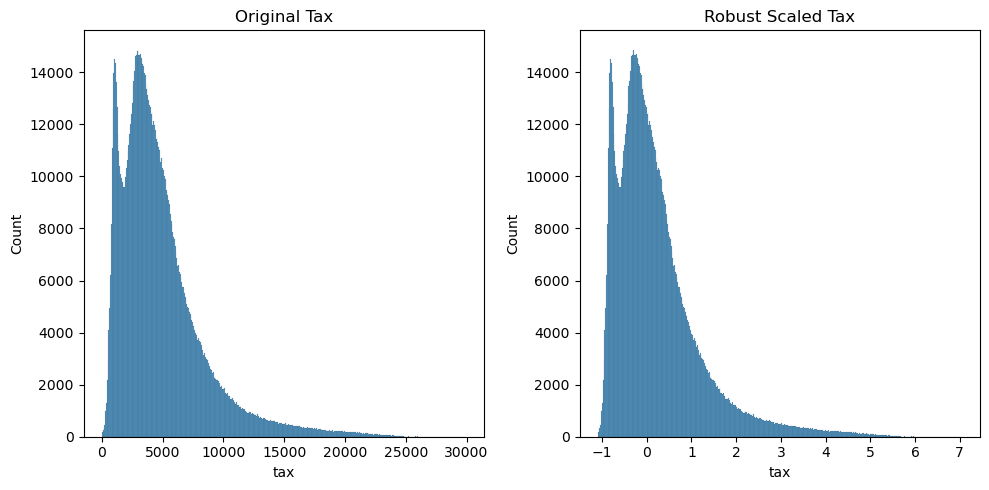

In [32]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram on the first subplot
sns.histplot(x = train.tax, ax=axes[0])
axes[0].set_title('Original Tax')

# Plot the second histogram on the second subplot
sns.histplot(x = df_X_train_scaled.tax, ax=axes[1])
axes[1].set_title('Robust Scaled Tax')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# 2
Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [33]:
inversed = scaler.inverse_transform(df_X_train_scaled)
inversed

array([[4.000000e+00, 4.000000e+00, 4.147000e+03, ..., 1.198309e+04,
        0.000000e+00, 0.000000e+00],
       [2.000000e+00, 2.000000e+00, 1.376000e+03, ..., 4.001220e+03,
        0.000000e+00, 0.000000e+00],
       [4.000000e+00, 2.500000e+00, 2.080000e+03, ..., 1.961520e+03,
        1.000000e+00, 0.000000e+00],
       ...,
       [3.000000e+00, 2.000000e+00, 1.483000e+03, ..., 8.215850e+03,
        0.000000e+00, 0.000000e+00],
       [3.000000e+00, 2.000000e+00, 1.961000e+03, ..., 1.357011e+04,
        0.000000e+00, 0.000000e+00],
       [2.000000e+00, 1.500000e+00, 1.204000e+03, ..., 3.118280e+03,
        1.000000e+00, 0.000000e+00]])

In [34]:
df_inversed = pd.DataFrame(inversed)
df_inversed = df_inversed.rename(columns={0: 'bedrooms', 1: 'bathrooms', 2: 'sqft', 3: 'built', 4: 'tax', 5: 'Orange', 6:'Ventura'})

df_inversed

,bedrooms,bathrooms,sqft,built,tax,Orange,Ventura
0,4.0,4.0,4147.0,1936.0,11983.09,0.0,0.0
1,2.0,2.0,1376.0,1949.0,4001.22,0.0,0.0
2,4.0,2.5,2080.0,1956.0,1961.52,1.0,0.0
3,3.0,2.0,1454.0,1975.0,6173.68,0.0,0.0
4,5.0,5.0,3614.0,2001.0,10805.58,1.0,0.0
...,...,...,...,...,...,...,...
1253344,4.0,3.0,3034.0,1954.0,2698.01,0.0,0.0
1253345,2.0,1.0,700.0,1920.0,2748.98,0.0,0.0
1253346,3.0,2.0,1483.0,1950.0,8215.85,0.0,0.0
1253347,3.0,2.0,1961.0,1940.0,13570.11,0.0,0.0


- the data frame is now reverted, however it doesn't match the identifier

# 3
Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [35]:
#making our transformer
transformer = QuantileTransformer(output_distribution='normal')
#fitting our transformer
# AND!!!!
#using the scaler on train
X_train_transformed = transformer.fit_transform(X_train)
#using our scaler on validate
X_validate_transformed = transformer.transform(X_validate)

In [36]:
X_train_transformed

array([[ 0.76639141,  1.78615556,  2.2884534 , ...,  1.65046494,
        -5.19933758, -5.19933758],
       [-1.3279816 , -0.14985264, -0.40744159, ..., -0.01498593,
        -5.19933758, -5.19933758],
       [ 0.76639141,  0.5249764 ,  0.59843525, ..., -0.92538283,
         5.19933758, -5.19933758],
       ...,
       [-0.25101592, -0.14985264, -0.20209835, ...,  1.10630315,
        -5.19933758, -5.19933758],
       [-0.25101592, -0.14985264,  0.47030358, ...,  1.82094231,
        -5.19933758, -5.19933758],
       [-1.3279816 , -0.81614989, -0.78845531, ..., -0.38161716,
         5.19933758, -5.19933758]])

In [37]:
# Convert the array to a DataFrame
df_X_train_quantile = pd.DataFrame(X_train_transformed)
df_X_train_quantile = df_X_train_quantile.rename(columns={0: 'bedrooms', 1: 'bathrooms', 2: 'sqft', 3: 'built', 4: 'tax', 5: 'Orange', 6:'Ventura'})

df_X_train_quantile

,bedrooms,bathrooms,sqft,built,tax,Orange,Ventura
0,0.766391,1.786156,2.288453,-1.215372,1.650465,-5.199338,-5.199338
1,-1.327982,-0.149853,-0.407442,-0.684763,-0.014986,-5.199338,-5.199338
2,0.766391,0.524976,0.598435,-0.103057,-0.925383,5.199338,-5.199338
3,-0.251016,-0.149853,-0.254902,0.699108,0.669342,-5.199338,-5.199338
4,1.727466,2.432017,1.906519,1.700222,1.512518,5.199338,-5.199338
...,...,...,...,...,...,...,...
1253344,0.766391,0.967422,1.464593,-0.287442,-0.585440,-5.199338,-5.199338
1253345,-1.327982,-1.278137,-2.306226,-1.910600,-0.559705,-5.199338,-5.199338
1253346,-0.251016,-0.149853,-0.202098,-0.601439,1.106303,-5.199338,-5.199338
1253347,-0.251016,-0.149853,0.470304,-1.066304,1.820942,-5.199338,-5.199338


# Visualize Bedrooms

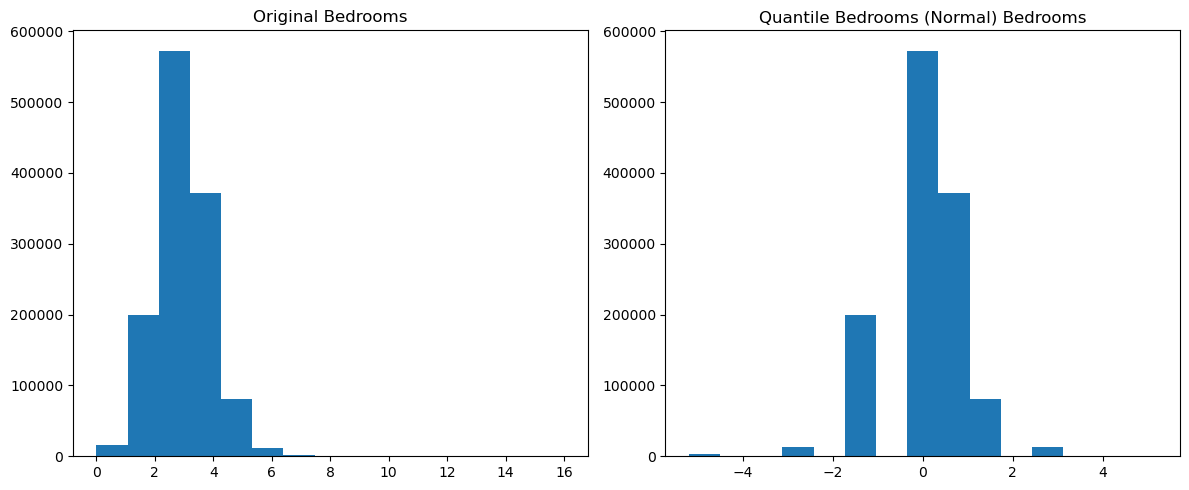

In [38]:
# Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first histogram on the first subplot
axes[0].hist(train.bedrooms, bins=15)
axes[0].set_title('Original Bedrooms')

# Plot the second histogram on the second subplot
axes[1].hist(df_X_train_quantile.bedrooms, bins=15)
axes[1].set_title('Quantile Bedrooms (Normal) Bedrooms')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Visualize Bathrooms

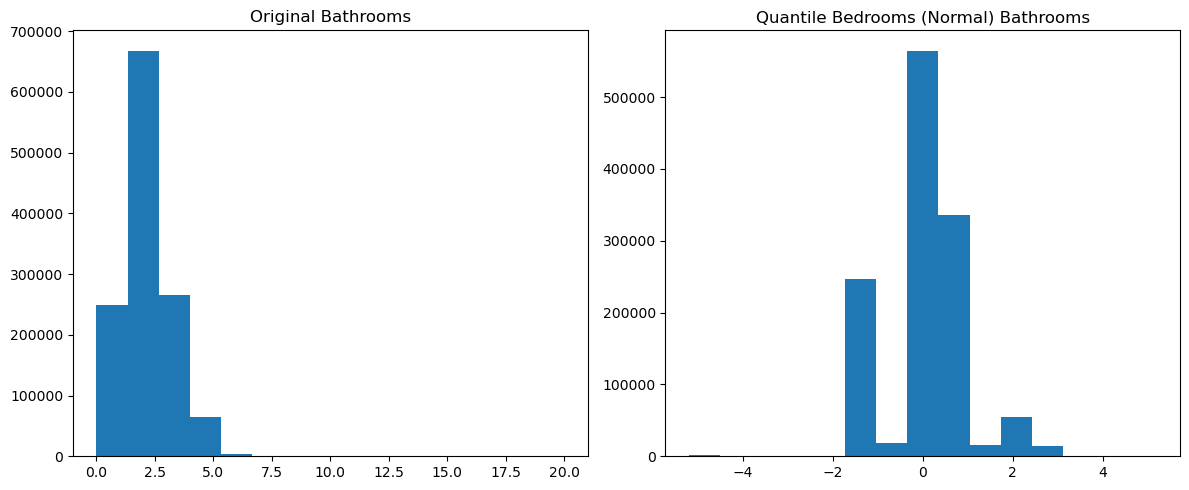

In [39]:
# Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first histogram on the first subplot
axes[0].hist(train.bathrooms, bins=15)
axes[0].set_title('Original Bathrooms')

# Plot the second histogram on the second subplot
axes[1].hist(df_X_train_quantile.bathrooms, bins=15)
axes[1].set_title('Quantile Bedrooms (Normal) Bathrooms')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Visualize Square Feet

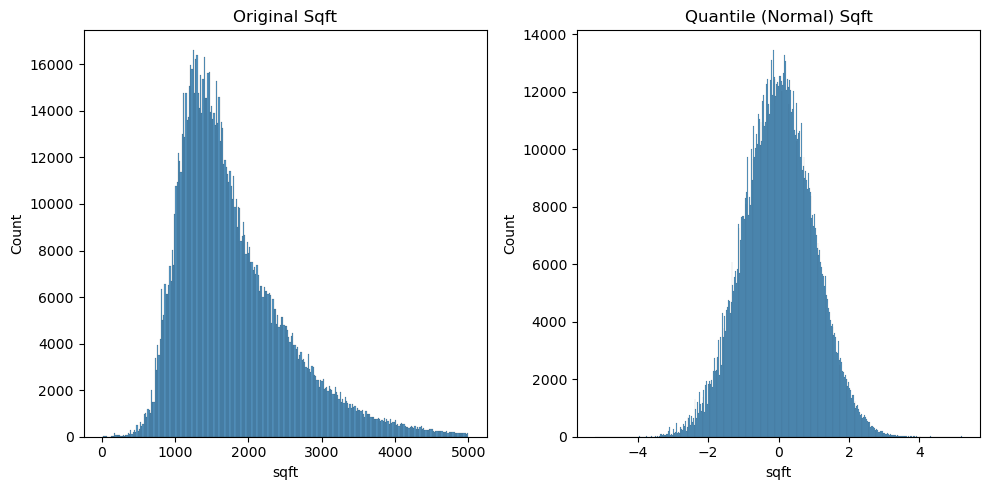

In [40]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram on the first subplot
sns.histplot(x = train.sqft, ax=axes[0])
axes[0].set_title('Original Sqft')

# Plot the second histogram on the second subplot
sns.histplot(x = df_X_train_quantile.sqft, ax=axes[1])
axes[1].set_title('Quantile (Normal) Sqft')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Visualize Year Built

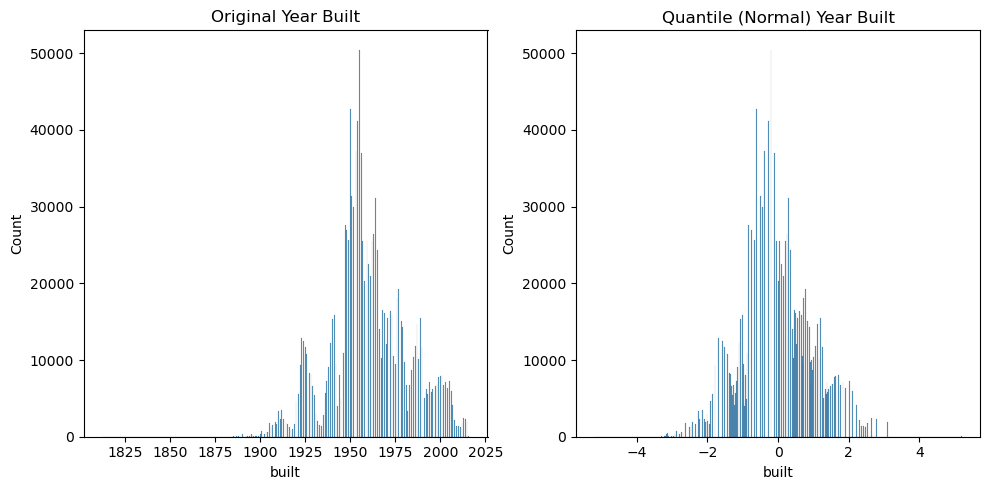

In [41]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram on the first subplot
sns.histplot(x = train.built, ax=axes[0])
axes[0].set_title('Original Year Built')

# Plot the second histogram on the second subplot
sns.histplot(x = df_X_train_quantile.built, ax=axes[1])
axes[1].set_title('Quantile (Normal) Year Built')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Visualize Tax

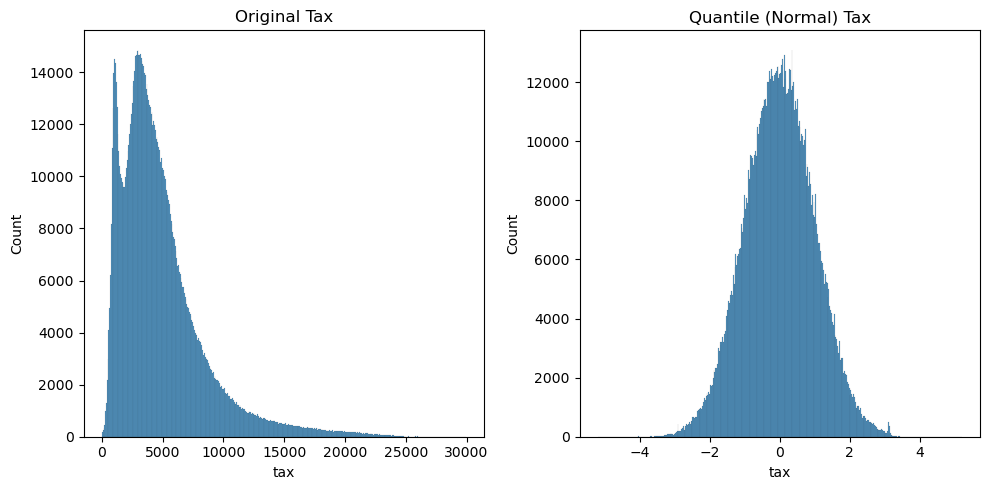

In [42]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram on the first subplot
sns.histplot(x = train.tax, ax=axes[0])
axes[0].set_title('Original Tax')

# Plot the second histogram on the second subplot
sns.histplot(x = df_X_train_quantile.tax, ax=axes[1])
axes[1].set_title('Quantile (Normal) Tax')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# 4
Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [43]:
#making our transformer
transformer = QuantileTransformer(output_distribution='uniform')
#fitting our transformer
# AND!!!!
#using the scaler on train
X_train_transformed = transformer.fit_transform(X_train)
#using our scaler on validate
X_validate_transformed = transformer.transform(X_validate)

In [44]:
X_train_transformed

array([[0.77727728, 0.96396396, 0.98920624, ..., 0.95113414, 0.        ,
        0.        ],
       [0.09259259, 0.43893894, 0.34334334, ..., 0.49630812, 0.        ,
        0.        ],
       [0.77727728, 0.6981982 , 0.72672673, ..., 0.17677814, 1.        ,
        0.        ],
       ...,
       [0.4014014 , 0.43893894, 0.42142142, ..., 0.86674957, 0.        ,
        0.        ],
       [0.4014014 , 0.43893894, 0.68234902, ..., 0.96623447, 0.        ,
        0.        ],
       [0.09259259, 0.20620621, 0.21521522, ..., 0.35362695, 1.        ,
        0.        ]])

In [45]:
# Convert the array to a DataFrame
df_X_train_quantile = pd.DataFrame(X_train_transformed)
df_X_train_quantile = df_X_train_quantile.rename(columns={0: 'bedrooms', 1: 'bathrooms', 2: 'sqft', 3: 'built', 4: 'tax', 5: 'Orange', 6:'Ventura'})

df_X_train_quantile

,bedrooms,bathrooms,sqft,built,tax,Orange,Ventura
0,0.777277,0.963964,0.989206,0.114114,0.951134,0.0,0.0
1,0.092593,0.438939,0.343343,0.247748,0.496308,0.0,0.0
2,0.777277,0.698198,0.726727,0.456456,0.176778,1.0,0.0
3,0.401401,0.438939,0.400400,0.754254,0.749195,0.0,0.0
4,0.956957,0.992492,0.972226,0.953954,0.935006,1.0,0.0
...,...,...,...,...,...,...,...
1253344,0.777277,0.832833,0.930021,0.384885,0.279234,0.0,0.0
1253345,0.092593,0.100100,0.011724,0.028028,0.288080,0.0,0.0
1253346,0.401401,0.438939,0.421421,0.274775,0.866750,0.0,0.0
1253347,0.401401,0.438939,0.682349,0.144645,0.966234,0.0,0.0


# Visualize Bedrooms

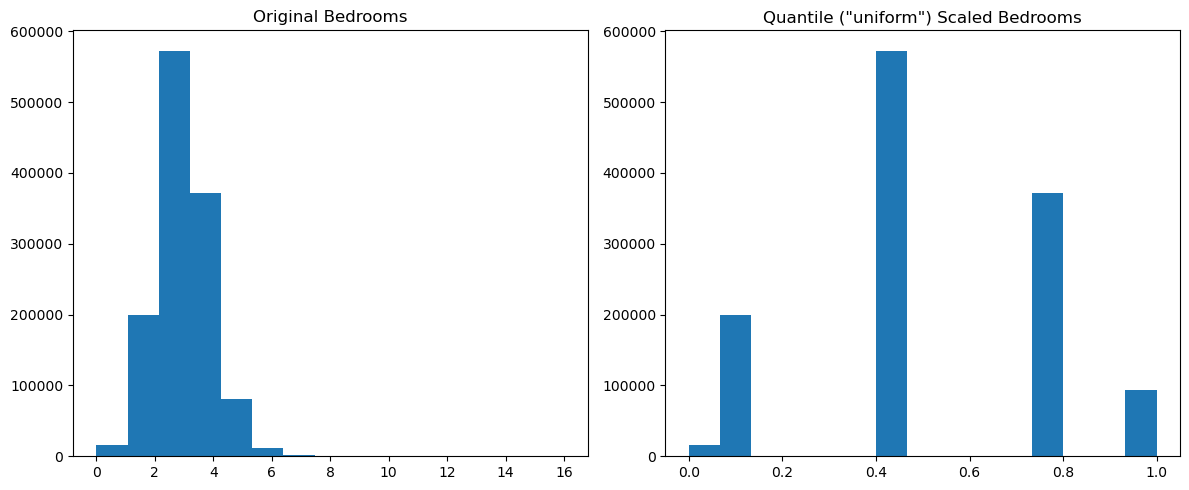

In [46]:
# Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first histogram on the first subplot
axes[0].hist(train.bedrooms, bins=15)
axes[0].set_title('Original Bedrooms')

# Plot the second histogram on the second subplot
axes[1].hist(df_X_train_quantile.bedrooms, bins=15)
axes[1].set_title('Quantile ("uniform") Scaled Bedrooms')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Visualize Bathrooms

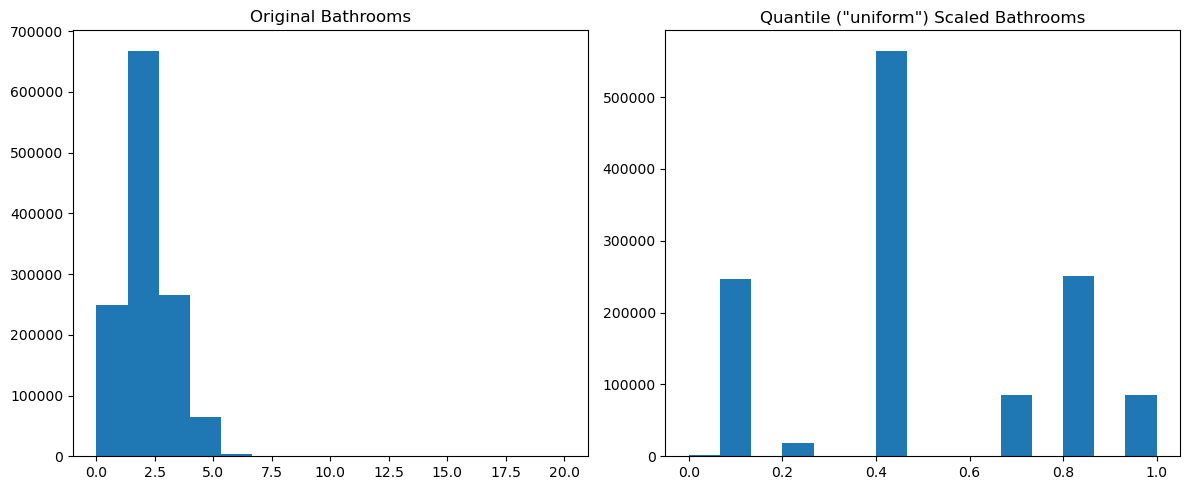

In [47]:
# Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first histogram on the first subplot
axes[0].hist(train.bathrooms, bins=15)
axes[0].set_title('Original Bathrooms')

# Plot the second histogram on the second subplot
axes[1].hist(df_X_train_quantile.bathrooms, bins=15)
axes[1].set_title('Quantile ("uniform") Scaled Bathrooms')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Visualize Square Feet

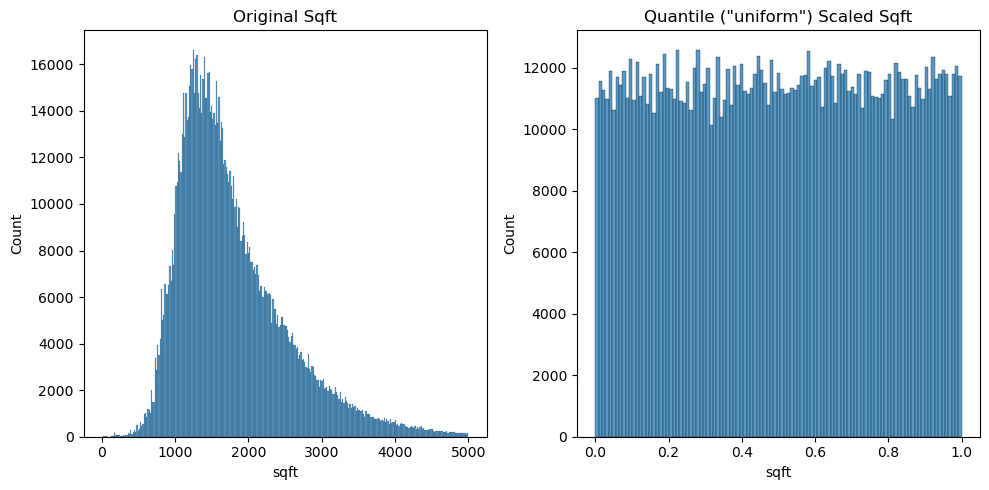

In [48]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram on the first subplot
sns.histplot(x = train.sqft, ax=axes[0])
axes[0].set_title('Original Sqft')

# Plot the second histogram on the second subplot
sns.histplot(x = df_X_train_quantile.sqft, ax=axes[1])
axes[1].set_title('Quantile ("uniform") Scaled Sqft')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Visualize Year Built

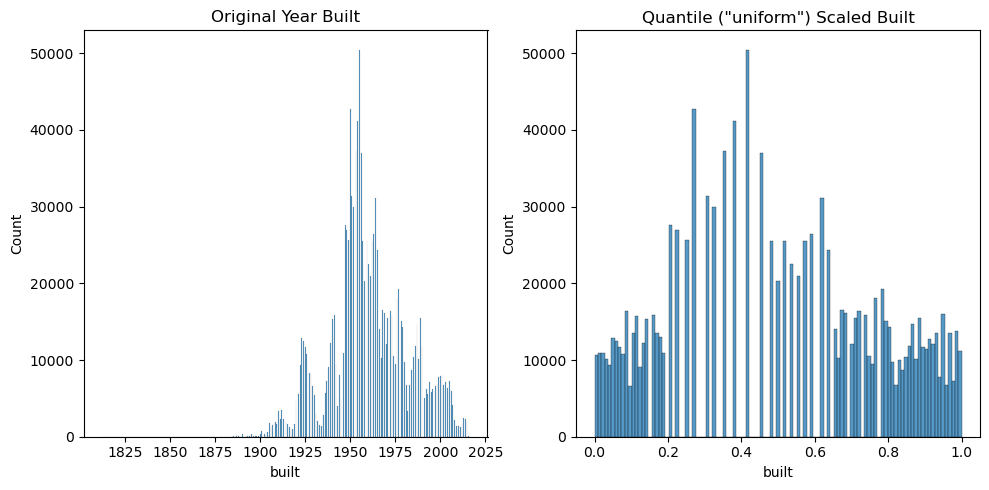

In [49]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram on the first subplot
sns.histplot(x = train.built, ax=axes[0])
axes[0].set_title('Original Year Built')

# Plot the second histogram on the second subplot
sns.histplot(x = df_X_train_quantile.built, ax=axes[1])
axes[1].set_title('Quantile ("uniform") Scaled Built')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Visualize Tax

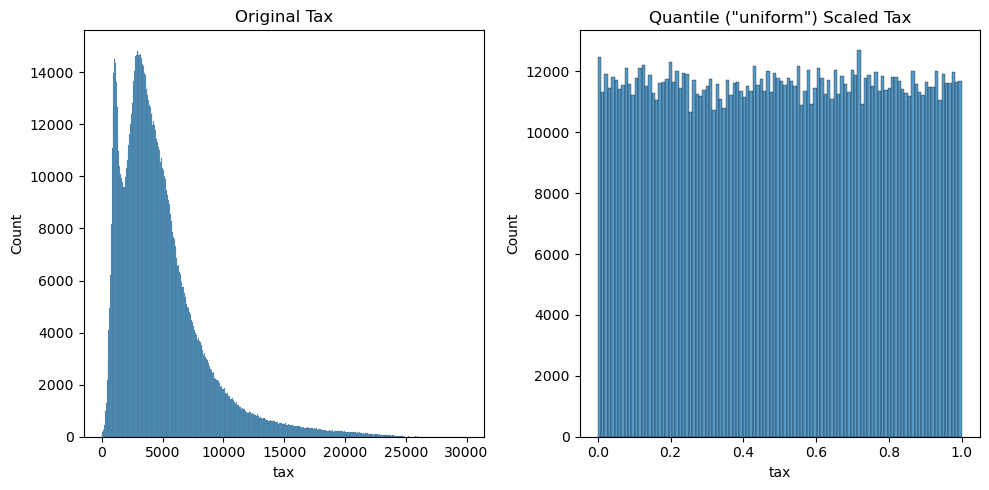

In [50]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first histogram on the first subplot
sns.histplot(x = train.tax, ax=axes[0])
axes[0].set_title('Original Tax')

# Plot the second histogram on the second subplot
sns.histplot(x = df_X_train_quantile.tax, ax=axes[1])
axes[1].set_title('Quantile ("uniform") Scaled Tax')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# 5
Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [51]:
# get data
df = w.wrangle_zillow()

csv file found and loaded


In [54]:
# split data
train, validate, test = p.split_data(df)
train

,taxvalue,bedrooms,bathrooms,sqft,built,tax,fips,Orange,Ventura
79491,971944.0,4.0,4.0,4147.0,1936.0,11983.09,LA,0,0
1190772,300625.0,2.0,2.0,1376.0,1949.0,4001.22,LA,0,0
353207,153847.0,4.0,2.5,2080.0,1956.0,1961.52,Orange,1,0
834944,489948.0,3.0,2.0,1454.0,1975.0,6173.68,LA,0,0
1679023,783282.0,5.0,5.0,3614.0,2001.0,10805.58,Orange,1,0
...,...,...,...,...,...,...,...,...,...
756875,198574.0,4.0,3.0,3034.0,1954.0,2698.01,LA,0,0
1994952,229000.0,2.0,1.0,700.0,1920.0,2748.98,LA,0,0
1058065,673096.0,3.0,2.0,1483.0,1950.0,8215.85,LA,0,0
367254,1117790.0,3.0,2.0,1961.0,1940.0,13570.11,LA,0,0


In [53]:
# scale
X_train_scaled, X_validate_scaled, X_validate_scaled, y_train, y_validate, y_test = p.scaled_df(train, validate, test)
X_train_scaled

,bedrooms,bathrooms,sqft,built,tax,Orange,Ventura
0,0.2500,0.200,0.829366,0.607843,0.400071,0.0,0.0
1,0.1250,0.100,0.275055,0.671569,0.133445,0.0,0.0
2,0.2500,0.125,0.415883,0.705882,0.065311,1.0,0.0
3,0.1875,0.100,0.290658,0.799020,0.206014,0.0,0.0
4,0.3125,0.250,0.722745,0.926471,0.360738,1.0,0.0
...,...,...,...,...,...,...,...
1253344,0.2500,0.150,0.606721,0.696078,0.089912,0.0,0.0
1253345,0.1250,0.050,0.139828,0.529412,0.091615,0.0,0.0
1253346,0.1875,0.100,0.296459,0.676471,0.274230,0.0,0.0
1253347,0.1875,0.100,0.392078,0.627451,0.453084,0.0,0.0
